In [50]:
import os
import flopy
import numpy as np
import matplotlib.pyplot as plt
import flopy.utils.binaryfile as bf
import geopandas as gpd


ModuleNotFoundError: No module named 'earthpy'

In [27]:
## Set up directory referencing
# Package data
gwfm_dir = os.path.dirname(os.path.dirname(os.getcwd()))

In [28]:
def plot_lines(lines):
    fig, ax = plt.subplots()
    for ln in lines:
        plt.plot([ln[0][0], ln[1][0]], [ln[0][1], ln[1][1]], linewidth = 0.1)

In [ ]:
# Import location of sensors
spath = "C://Users/ajcalder/Box/Research_Calderwood/dem"
df = pd.read_csv(spath+"/allsensor_latlong.csv", parse_dates = True, 
                index_col = 0, sep = ',', header = 'infer')

lat = df.Latitude.values
lon = df.Longitude.values

# Change project of sensor locations
crs_wgs = pyproj.CRS("epsg:4326")
crs_utm = pyproj.CRS("epsg:32610")
transformer = pyproj.Transformer.from_crs(crs_wgs, crs_utm, always_xy = True)
# Convert WGS Lat and long to Easting and Northing in Zone 10N
east, north = transformer.transform(lon,lat)

In [20]:
# Plot the basic model grid and sensors
plt.rcParams["figure.figsize"] = (20,10)
fig = plot_lines(mg.grid_lines)
plt.scatter(x = mg.extent[0:2], y = mg.extent[2:])
# plot_lines(mg.grid_lines)
plt.scatter(east, north, c='r')


NameError: name 'mg' is not defined

In [ ]:
sfr_dir = gwfm_dir+'/SFR_data'

In [ ]:
inflow = pd.read_csv(sfr_dir+'MB_daily_flow_cfs_2011_2019.csv', index_col = 'datetime', parse_dates = True)
inflow['flow_cmd'] = inflow.flow_cfs * (86400/(3.28**3))

inflow.flow_cmd.plot()

plt.xlabel('Date')
plt.ylabel('Discharge ($m^3/d)$')
plt.title('Measured Flow at Michigan Bar')
# plt.ticklabel_format(style='scientific') # or plain for all zeros

# plt.savefig('Plots/Model_SFR_UZF_Progress/historicalflow_2011_2019.png', dpi = 600, bbox_inches='tight')

## Plotting head raster and contours

In [63]:
loadpth = 'C:/wrdapp/GWFlowModel/Cosumnes/Cosumnes_simple'
model_ws = loadpth+'/WEL_RIV_RCH_tprogs_200layers/realization000'
m = flopy.modflow.Modflow.load('MF.nam', model_ws=model_ws, 
                                exe_name='MF2005', version='mf2005')

KeyboardInterrupt: 

In [30]:
hdobj = flopy.utils.HeadFile(model_ws +'/MF.hds')
spd_stp = hdobj.get_kstpkper()
spd_stp

[(0, 0)]

In [31]:
#head = hdobj.get_data(kstpkper = spd_stp[0])
head = hdobj.get_data(totim=1.0)

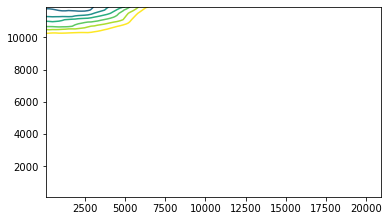

In [33]:
nrow=60
ncol=105
delr=200
delc=200
Lx = 21000
Ly = 12000
extent = (delr / 2.0, Lx - delr / 2.0, Ly - delc / 2.0, delc / 2.0)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.contour(head[0, :, :], levels=np.arange(1, 10, 1), extent = extent)

In [70]:
def plot_head(hdobj, name):
    head = hdobj.get_data(totim = 1.0)
    levels_hmax = np.round(np.max(head[head!=1E+30]),-1)
#     levels_hmin = np.round(np.min(head[head!=-999.99]),-1)
    levels_hmin = np.round(np.min(head[head>=-200]),-1)
   # frf = cbb.get_data(text='FLOW RIGHT FACE')[0]
   # fff = cbb.get_data(text='FLOW FRONT FACE')[0]

    levels = np.arange(levels_hmin, levels_hmax, 2)

    fig = plt.figure(figsize=(30, 20))

    ax = fig.add_subplot(1,1,1)
    ax.set_title(name+'Head Contours')
    mapview = flopy.plot.PlotMapView(model=m)
    quadmesh = mapview.plot_ibound()
#     line = mapview.plot_bc('RIV', plotAll=True)
    mapview.plot_bc("GHB", plotAll=True)
    mapview.plot_bc("CHD", plotAll=True)
    Teichert = gpd.read_file('C:/wrdapp/OHWD recharge project files/Kautz Property.shp')
    Teichert_3310 = Teichert.to_crs('epsg:3310')
    Teichert_3310.plot(ax = ax)

    contour_set = mapview.contour_array(head[5,:,:], masked_values=[-999.99, 1e+30], levels=levels)
#     quiver = mapview.plot_discharge(frf, fff, istep=10, jstep=10)  # no head array for volumetric discharge

    cb = plt.colorbar(contour_set, shrink = 0.5)
    cb.set_label('Head (m)')

    ax.ticklabel_format(style='plain')

    linecollection = mapview.plot_grid(linewidths = 0.3)
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
#     plt.savefig('Plots//'+name +'_head_contour.png', dpi = 600, bbox_inches='tight')

In [12]:
spd_stp

[(0, 0)]

In [62]:
mapview.crs

NameError: name 'mapview' is not defined

Teichert crs:  epsg:3857


<AxesSubplot:>

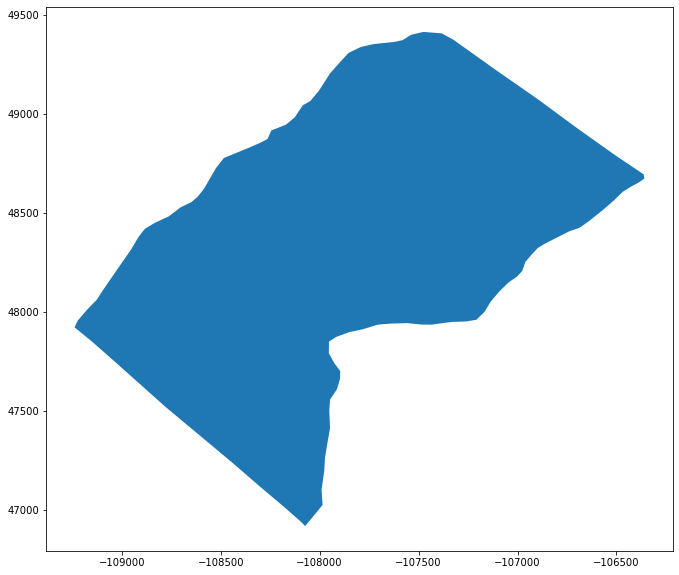

In [68]:
Teichert = gpd.read_file('C:/wrdapp/OHWD recharge project files/Kautz Property.shp')
Teichert_3310 = Teichert.to_crs('epsg:3310')
print('Teichert crs: ', Teichert.crs)
Teichert_3310.plot()


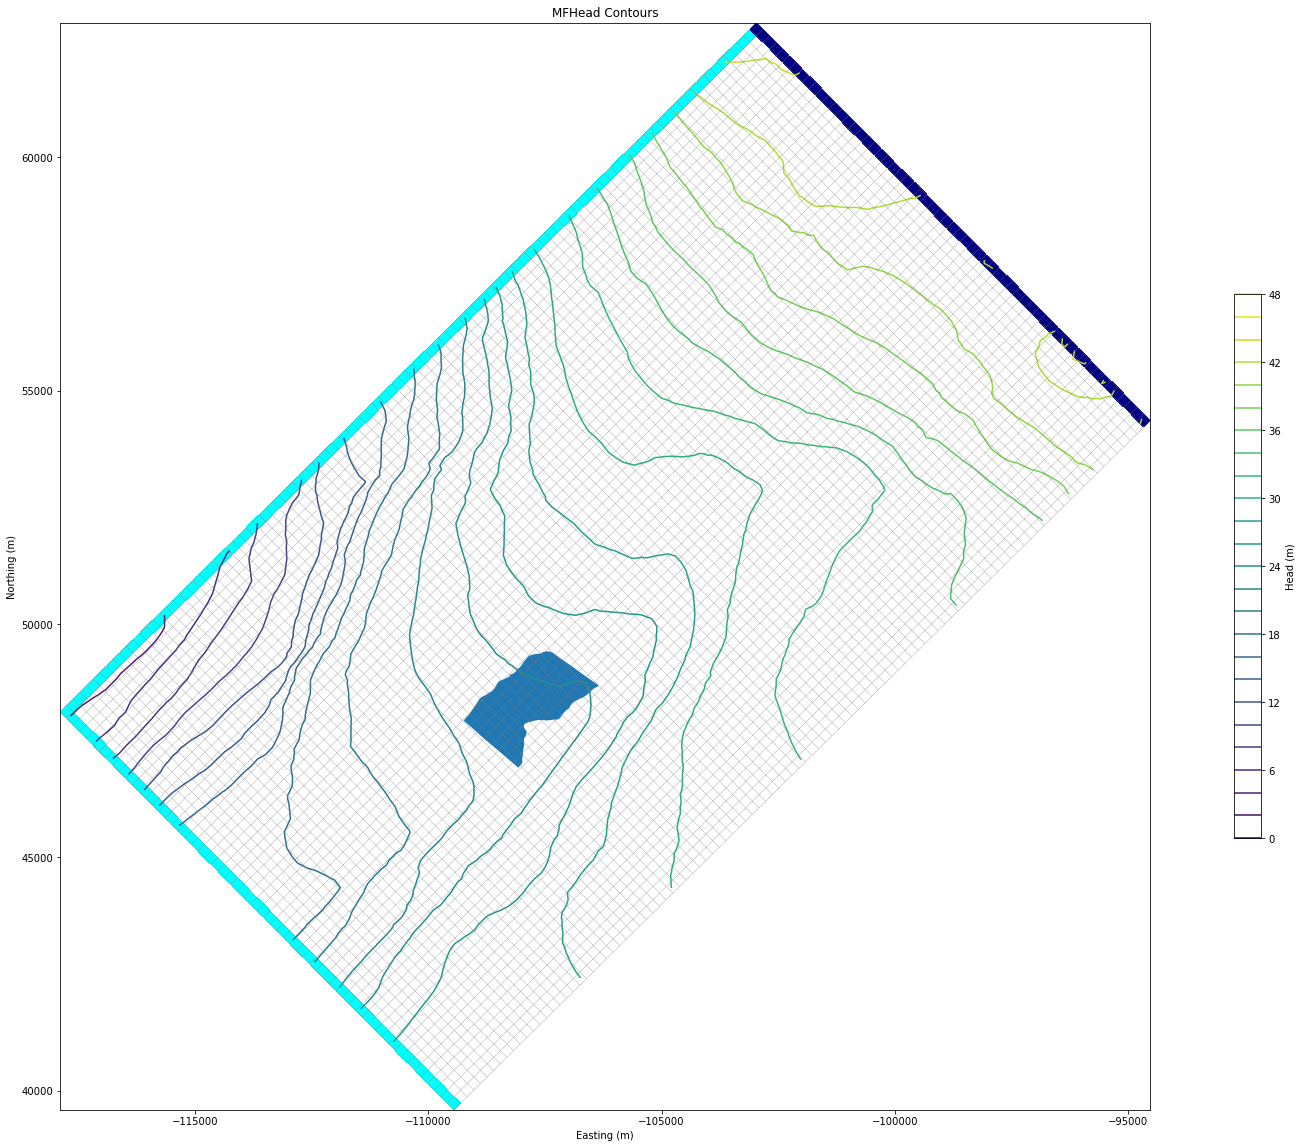

In [71]:
#cbb = flopy.utils.CellBudgetFile(model_ws +'/MF.cbc')

hdobj = flopy.utils.HeadFile(model_ws + '/MF.hds')
#spd_stp = hdobj.get_kstpkper()
# for i in np.arange(0,len(spd_stp)):
plot_head(hdobj, 'MF')



In [76]:
hdobj
heads = gpd.read_file(model_ws + '/MF.hds')

DriverError: 'C:/wrdapp/GWFlowModel/Cosumnes/Cosumnes_simple/WEL_RIV_RCH_tprogs_200layers/realization000/MF.hds' not recognized as a supported file format.

In [75]:
### Only show heads in Teichert

head_Teichert = gpd.clip(hdobj, Teichert_3310)

TypeError: 'gdf' should be GeoDataFrame or GeoSeries, got <class 'flopy.utils.binaryfile.HeadFile'>

In [ ]:
montecarlo distrubution, just at the recharge areas. Plot the pdf at each cell in the montecarlo

In [13]:
print(spd_stp)
head = hdobj.get_data(kstpkper = spd_stp[0])
print(head[0,91,215], head[10,94,218] ,head[0,85,187])
head = hdobj.get_data(kstpkper = spd_stp[1])
print(head[0,91,215], head[10,94,218] ,head[0,85,187])
head = hdobj.get_data(kstpkper = spd_stp[2])
print(head[0,91,215], head[10,94,218] ,head[0,85,187])
head = hdobj.get_data(kstpkper = spd_stp[3])
print(head[0,91,215], head[10,94,218] ,head[0,85,187])
head = hdobj.get_data(kstpkper = spd_stp[4])
print(head[0,91,215], head[10,94,218] ,head[0,85,187])
head = hdobj.get_data(kstpkper = spd_stp[5])
print(head[0,91,215], head[10,94,218] ,head[0,85,187])

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
-3377090.0 52.92073 54.618786
-3377090.0 52.92073 54.618786
-3377090.0 52.92073 54.618786
-3377090.0 52.92073 54.618786
-3377090.0 52.92073 54.618782
-3354283.0 52.96387 62.94015


In [11]:
#cbb.textlist
#spd_stp

[(0, 0), (0, 1)]

## Plot model domain and boundary conditions

C:\Users\ajcalder\anaconda3\envs\geosp\lib\site-packages\flopy\plot\map.py:525: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pa[list(idx[1:])] = 1


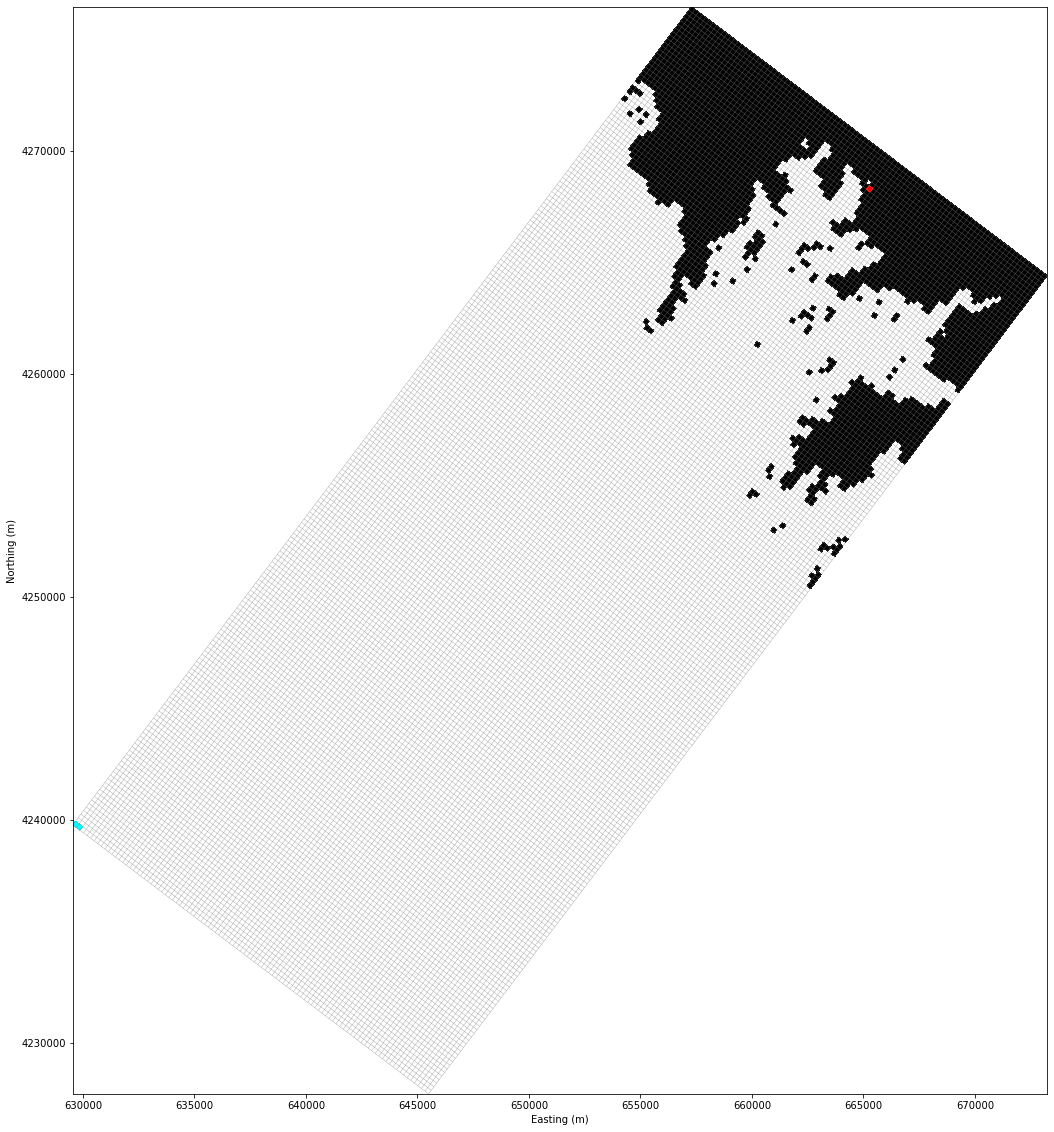

In [211]:
fig = plt.figure(figsize=(30, 20))

ax = fig.add_subplot(1,1,1)

mapview = flopy.plot.PlotMapView(model=m)
quadmesh = mapview.plot_ibound()
# line = mapview.plot_bc('RIV')
ghb = mapview.plot_bc("GHB", plotAll=True)
mapview.plot_bc("WEL", plotAll=True)

ax.ticklabel_format(style='plain')

linecollection = mapview.plot_grid(linewidths = 0.3)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.savefig('Plots//'+'MF' +'_boundary_conditions.png', dpi = 600, bbox_inches='tight')

## Plot model cross section

In [7]:

def plot_xs(hdobj, rowcol, rowcolnum, spd_stp, name):
    head = hdobj.get_data(kstpkper = spd_stp)
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(1, 1, 1)
    mcs = flopy.plot.PlotCrossSection(model=m, line={ rowcol : rowcolnum})
    linecollection = mcs.plot_grid()
    mcs.plot_ibound(color_ch = 'yellow', color_noflow = 'black')
    ghbline = mcs.plot_bc('GHB')
    mcs.plot_bc("CHD")

    for k in np.arange(0,head.shape[0]):
        wt = mcs.plot_surface(head[k,:,:], masked_values = [-999.99], label = 'Layer'+str(k), lw = 2.5)
    
    # plot the horizontal hydraulic conductivities
    a = m.upw.hk.array
    csa = mcs.plot_array(a)
    cb = plt.colorbar(csa, shrink=0.75)
    cb.set_label('Horiz. Cond. (m/month)')
    
    plt.ylabel('Elevation AMSL (m) ')
    plt.xlabel('Distance from West Model Boundary (m)')
    plt.legend(loc = (0.05,.7), prop={'size': 20})
    t = ax.set_title(name+'Row '+str(rowcolnum)+' Cross-Section - with IBOUND Boundary Conditions')
#     plt.savefig('Plots//'+name +'_xs_row_'+str(rownum)+'.png', bbox_inches='tight')


In [137]:
# head = hdobj.get_data(kstpkper = spd_stp[1])
# plt.imshow(head[0,:,:], vmin = -10, vmax = 70)
# plt.colorbar()
# np.savetxt('model_heads_after_sp6_use_for_strt_heads.tsv', head[0,:,:], delimiter = '\t')

In [8]:
hdobj = flopy.utils.HeadFile('data/MF.hds')


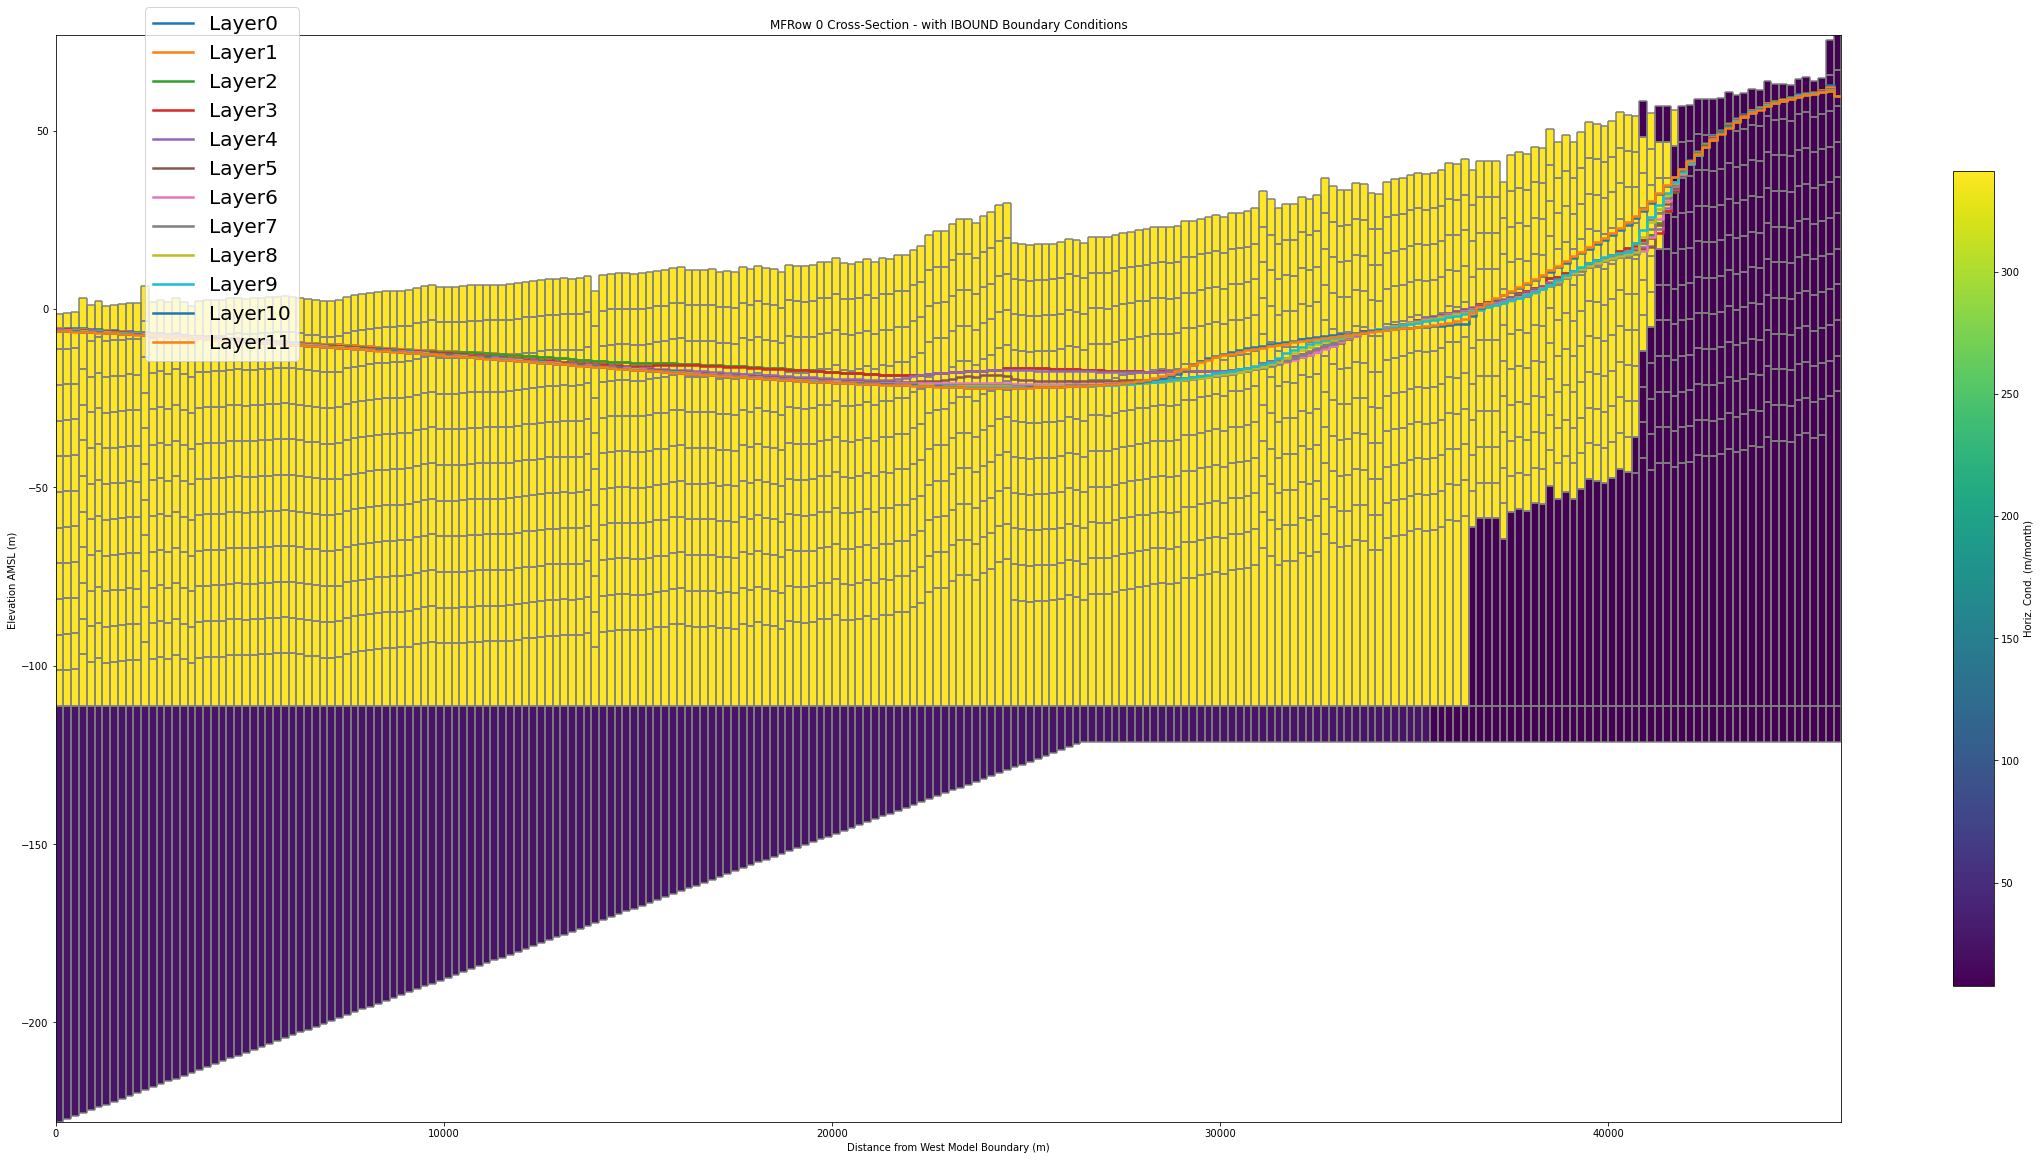

In [11]:
plot_xs(hdobj, 'Row', 0,  spd_stp[0], 'MF')


In [47]:
head = hdobj.get_data(kstpkper = spd_stp[4])
plt.contour(head

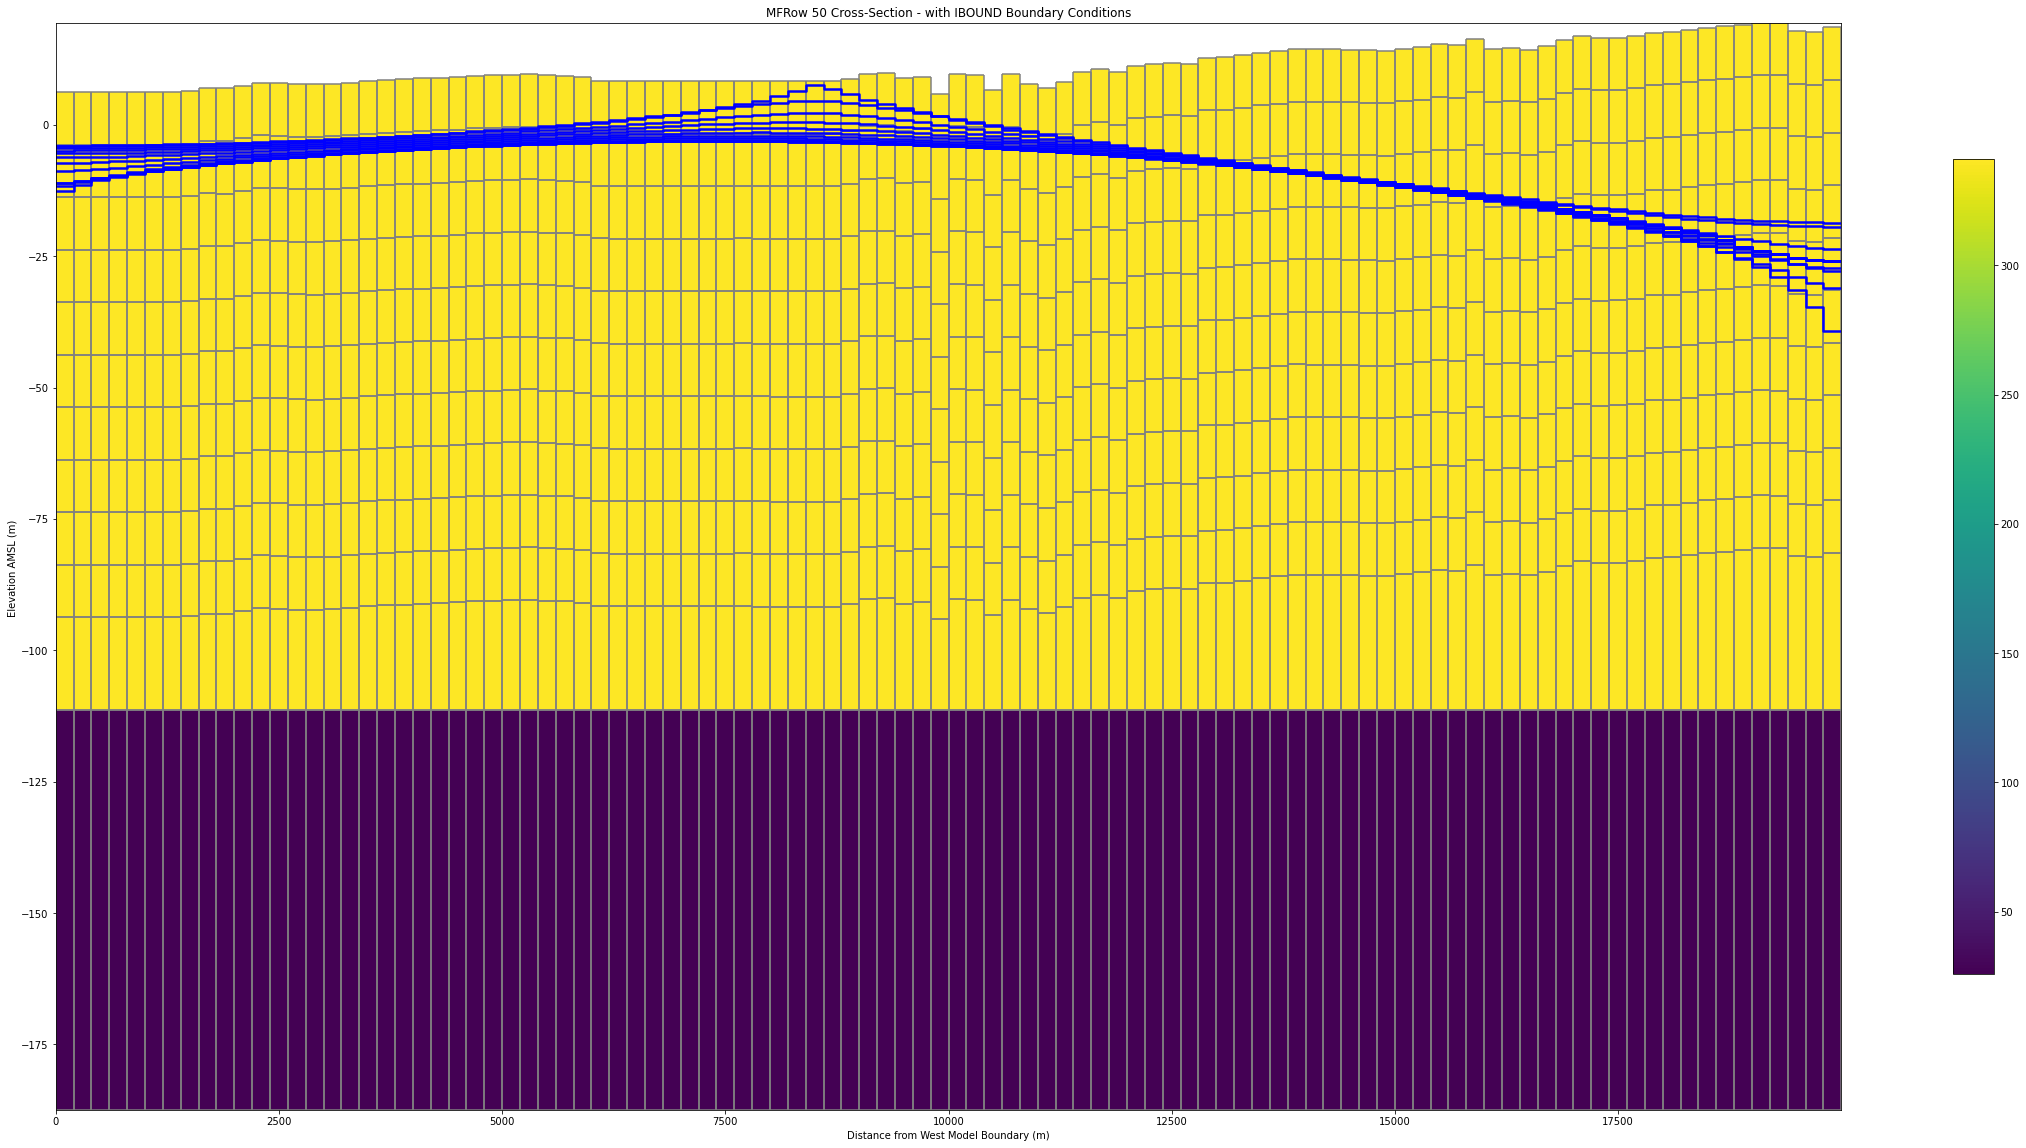

In [262]:
plot_xs(hdobj, 'Column', 50, spd_stp[0], 'MF')


## Model grid and layer review for TPROGS use

In [65]:
m.modelgrid.load_coord_info

<bound method Grid.load_coord_info of xll:639168.0879233824; yll:4229683.378775878; rotation:44.7; proj4_str:+proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs; units:meters; lenuni:2>

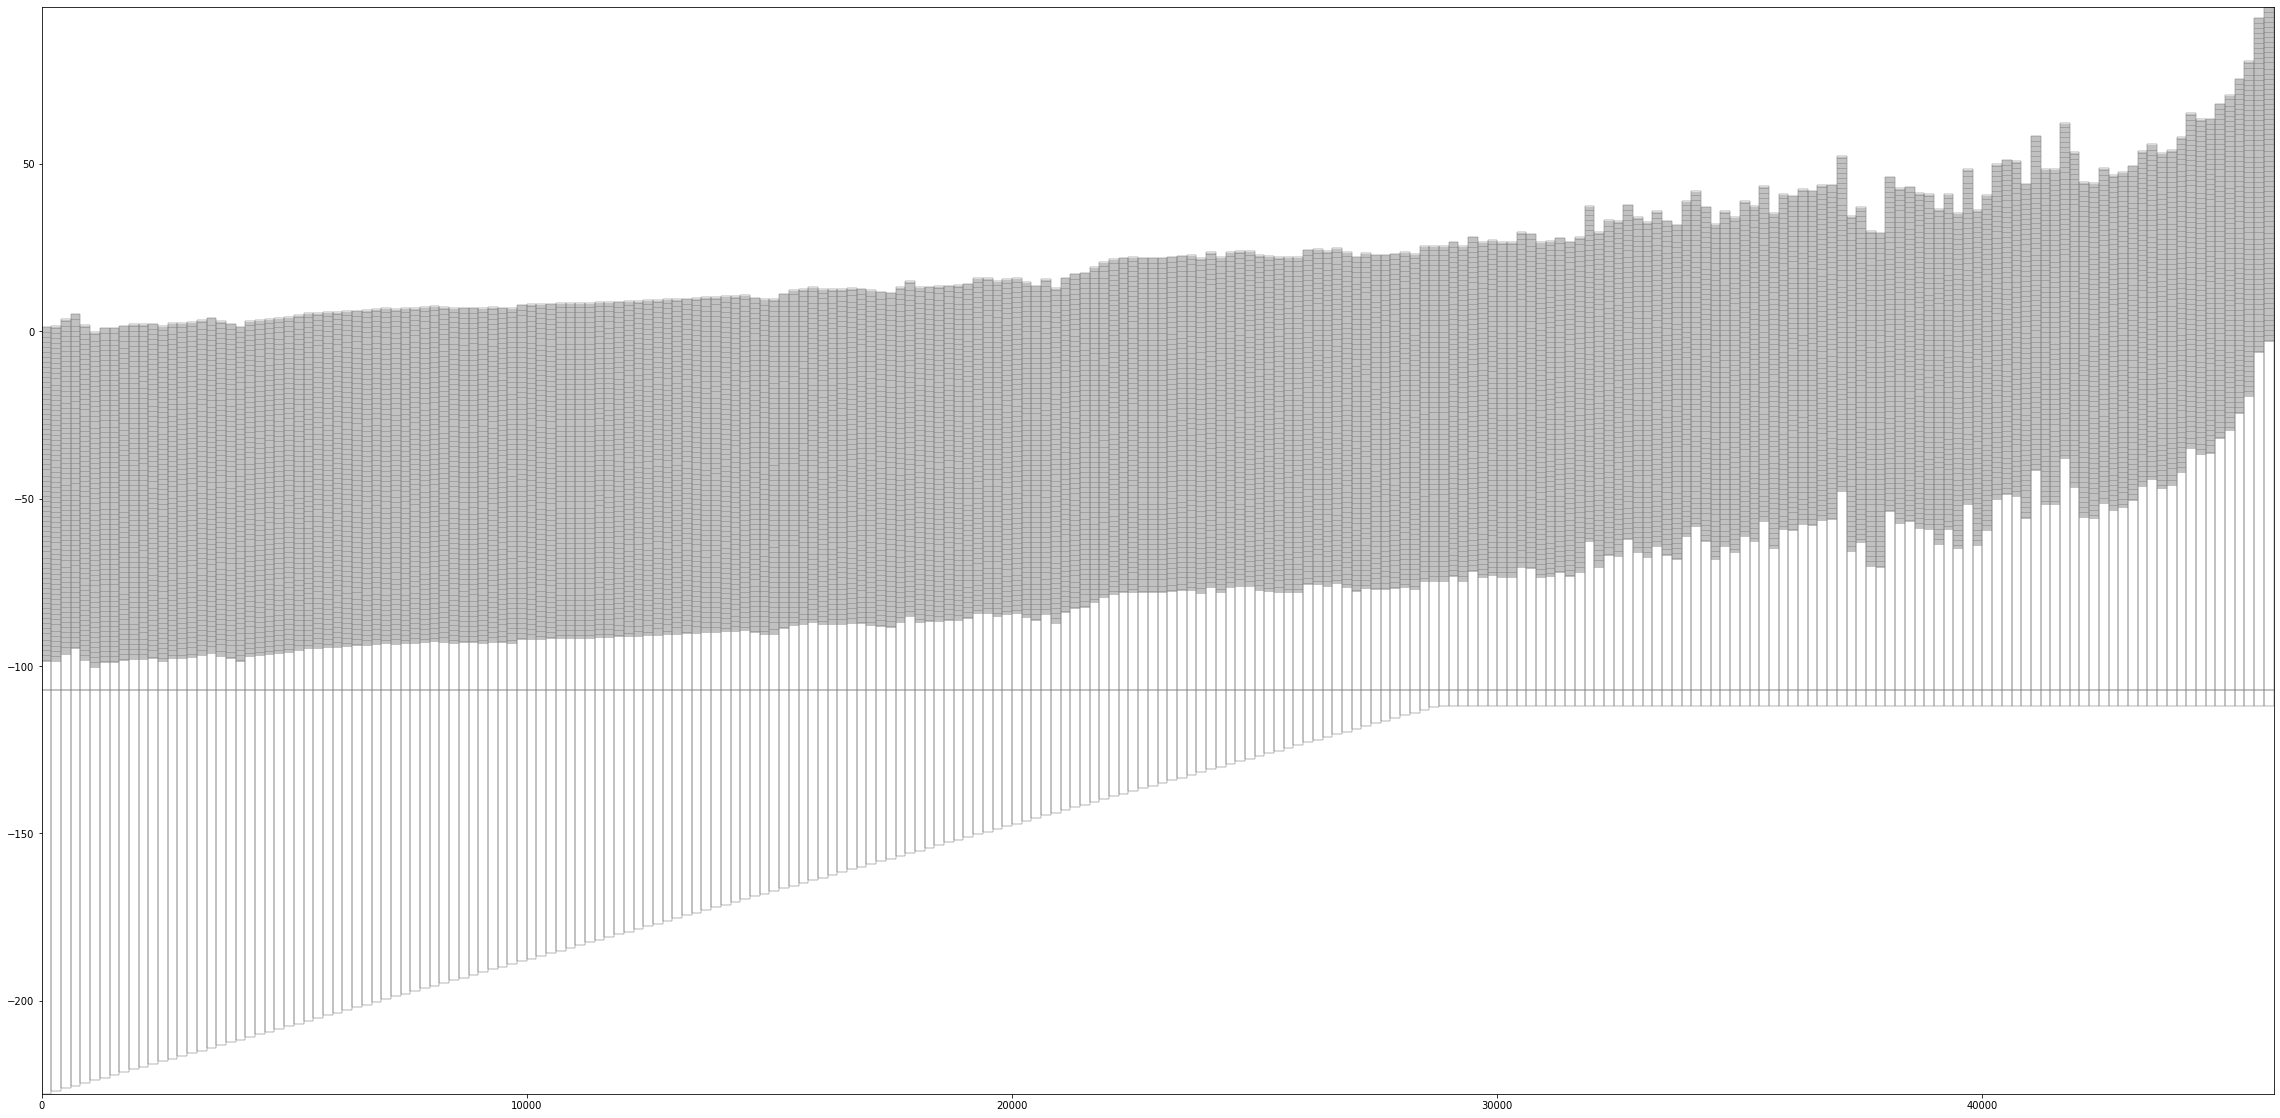

In [25]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1)


rownum = 75
mcs = flopy.plot.PlotCrossSection(model=m, line={'Row' : 40})
linecollection = mcs.plot_grid(linewidth = 0.3)
ax.add_collection(linecollection)


(0, 70)

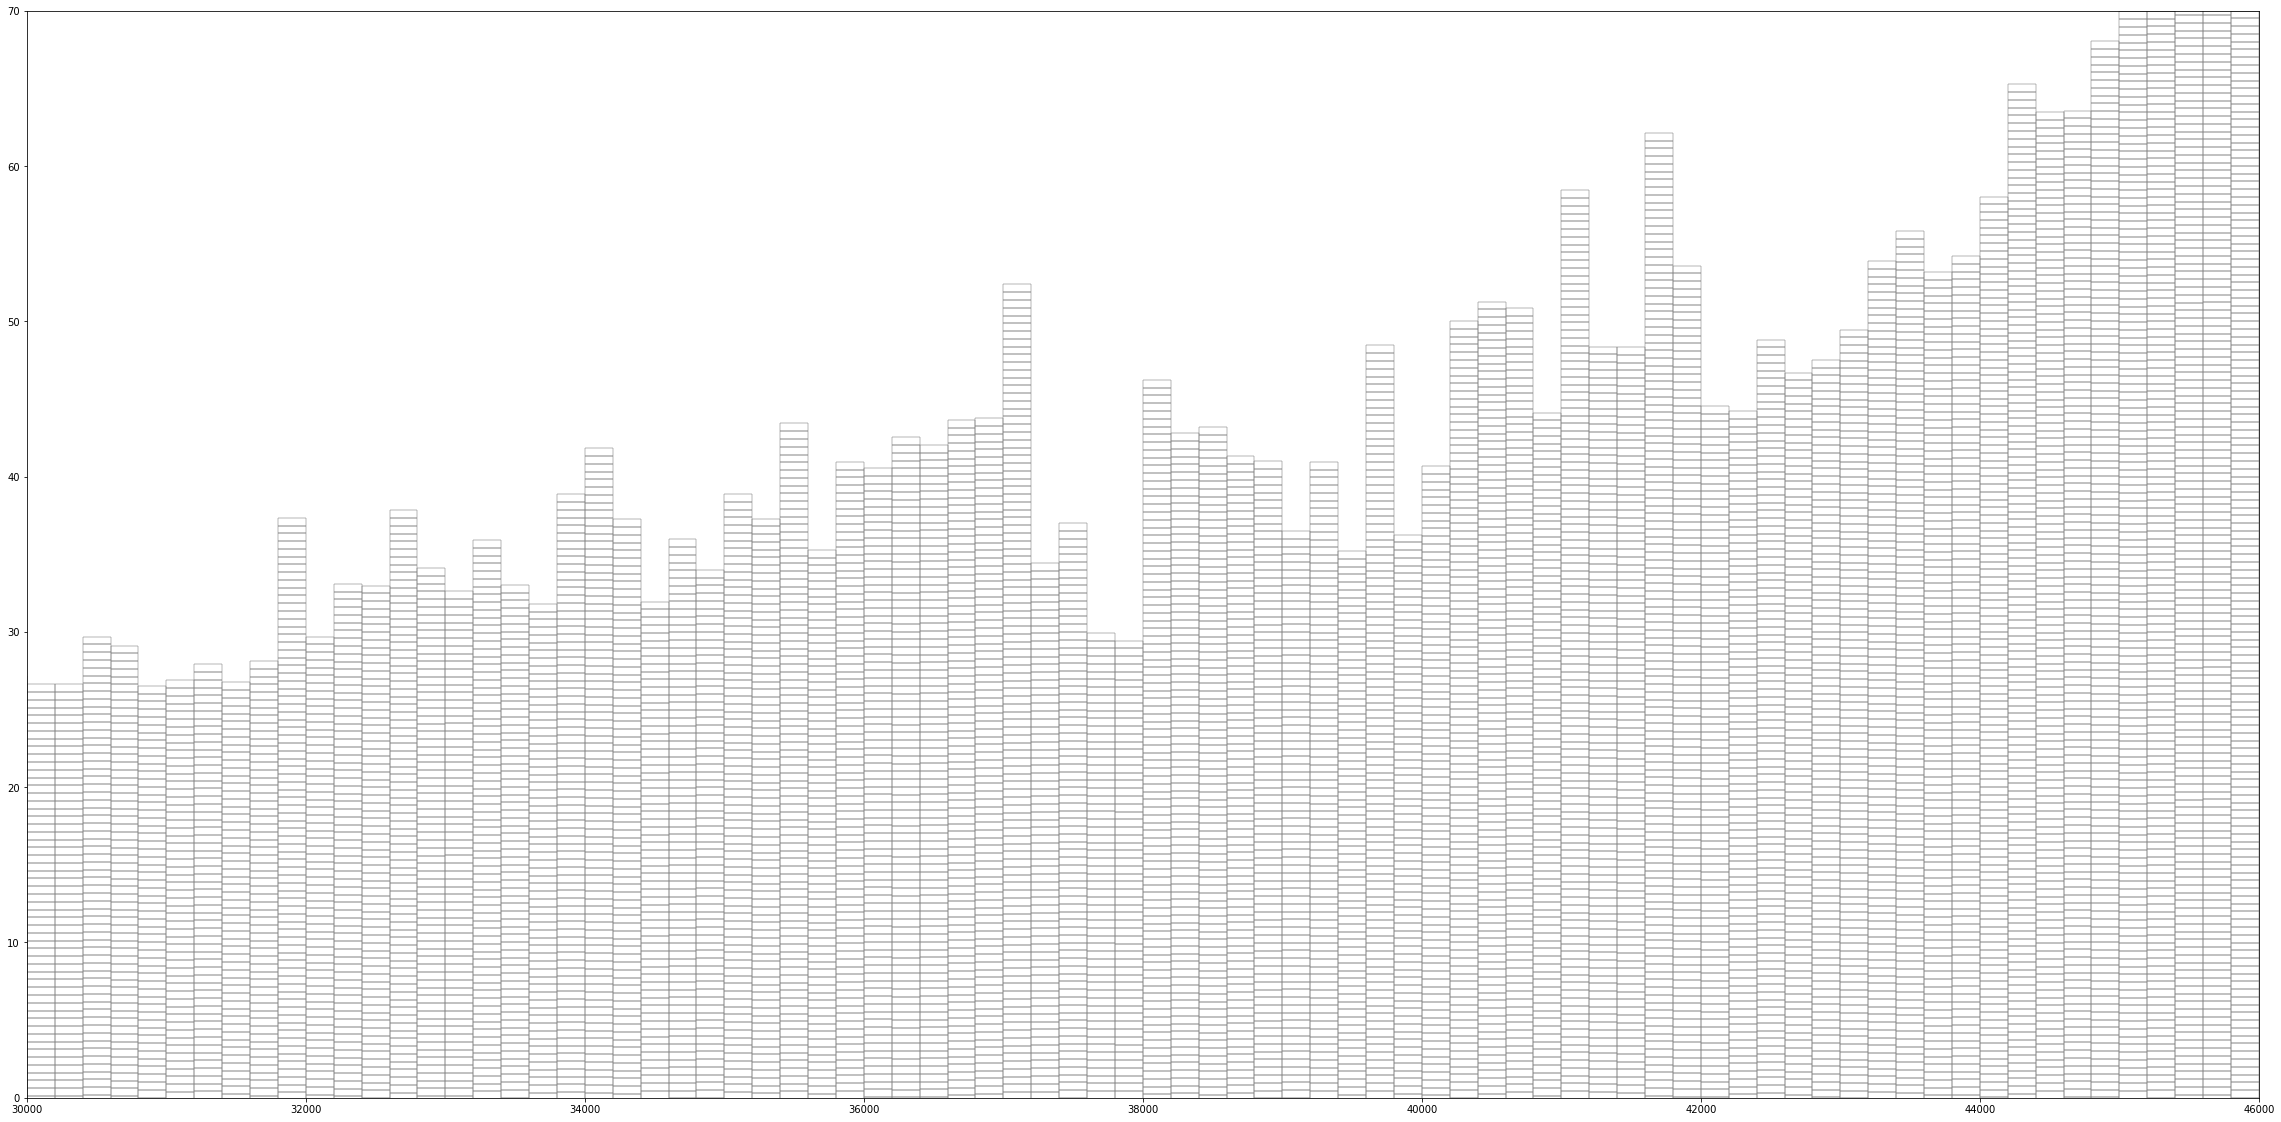

In [23]:
# head = hdobj.get_data(kstpkper = (0,0))
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1)


rownum = 75
mcs = flopy.plot.PlotCrossSection(model=m, line={'Row' : 40})
linecollection = mcs.plot_grid(linewidth = 0.3)
ax.add_collection(linecollection)
ax.set_xlim(30000, 46000)
ax.set_ylim(0, 70)

# wt = mcs.plot_surface(head, masked_values = [-999.99], color = 'blue', lw = 2.5)



(20, 50)

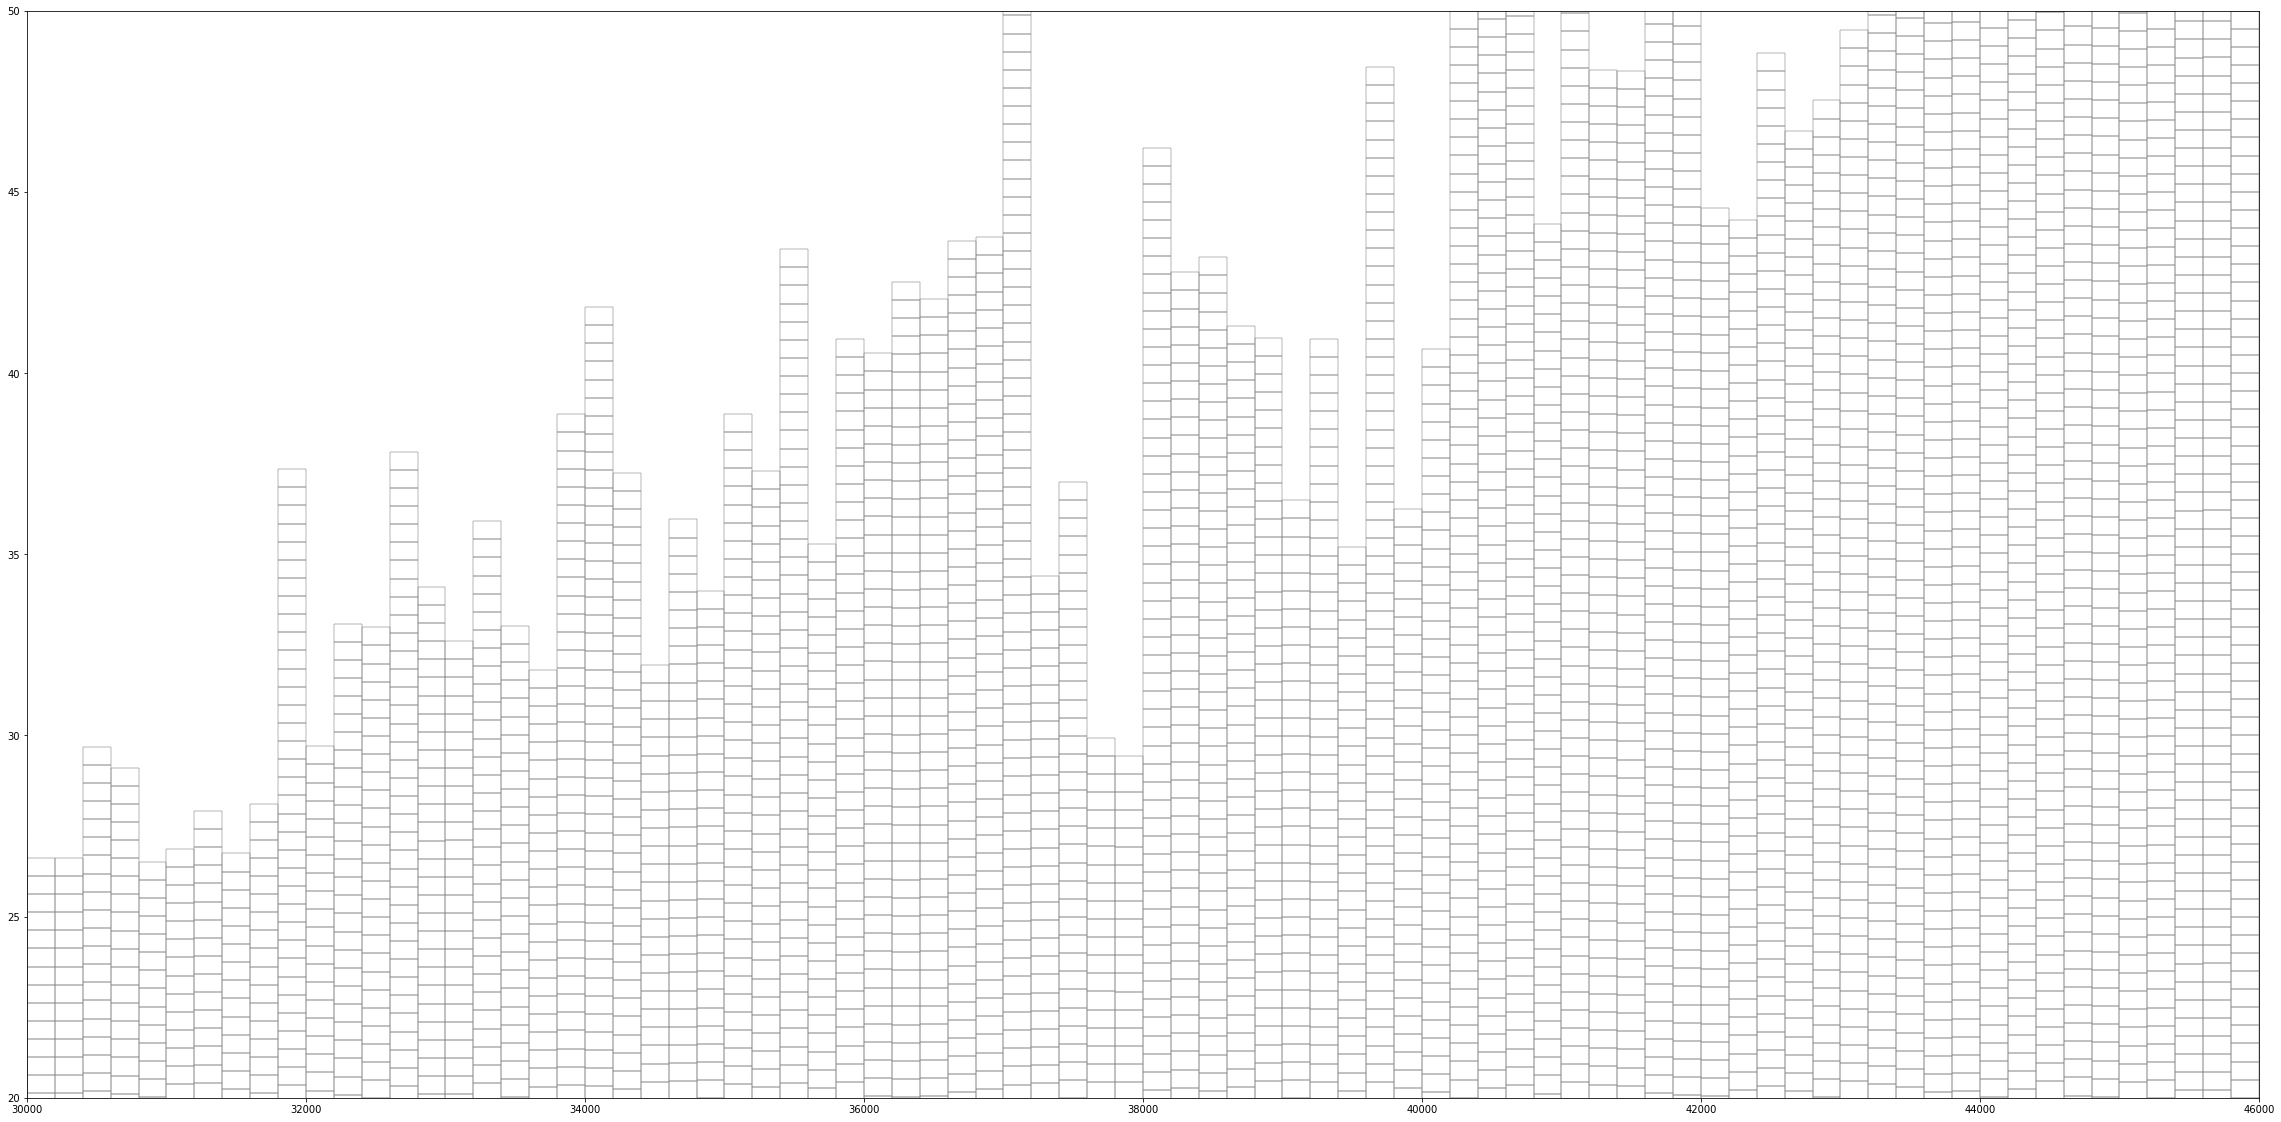

In [26]:
# head = hdobj.get_data(kstpkper = (0,0))
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1)


rownum = 75
mcs = flopy.plot.PlotCrossSection(model=m, line={'Row' : 40})
linecollection = mcs.plot_grid(linewidth = 0.3)
ax.add_collection(linecollection)
ax.set_xlim(30000, 46000)
ax.set_ylim(20, 50)

# wt = mcs.plot_surface(head, masked_values = [-999.99], color = 'blue', lw = 2.5)

